In [1]:
import pandas as pd                                 #import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.tokenize import word_tokenize,regexp_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem import WordNetLemmatizer

In [2]:
df1=pd.read_csv("amazon.csv")                      #read dataframe
df2=pd.read_csv("flipkart.csv")

In [3]:
df1.head()

,Unnamed: 0,Catogery,Summery,Review,Rating
0,0,laptop,The Best Lg has to offer,Its a very well built ultra light 17 inch lapt...,5.0 out of 5 stars
1,1,laptop,Just awesome. Best in class,Your browser does not support HTML5 video.\n G...,5.0 out of 5 stars
2,2,laptop,In-depth review + update at 60 days,In-depth review and research..\n\nI am a lapto...,5.0 out of 5 stars
3,3,laptop,Bang for the bucks.,1. Display -10\n2. Sound - 9\n3. Trackpad - 8\...,5.0 out of 5 stars
4,4,laptop,100% Value for money.,This laptop is designed for following basic ta...,5.0 out of 5 stars


In [4]:
df2.head()

,Unnamed: 0,Catogery,Summery,Review,Rating
0,0,laptop,Unsatisfactory,I m using this laptop last 5 days proceser was...,1
1,1,laptop,Worthless,Its a utter waste to spend money on this produ...,1
2,2,laptop,Utterly Disappointed,Very slow processing,1
3,3,laptop,Worthless,Not satisfied. Very slow processing.\nGo for l...,1
4,4,laptop,Did not meet expectations,I bought this laptop on 14may2021. And i am ex...,1


In [5]:
df1["Rating"]=df1["Rating"].str.split(".",expand=True)[0]         #filter exact rating number 

In [6]:
df1["Rating"]=df1["Rating"].astype(int)                          #convert to int

In [7]:
df1.head()

,Unnamed: 0,Catogery,Summery,Review,Rating
0,0,laptop,The Best Lg has to offer,Its a very well built ultra light 17 inch lapt...,5
1,1,laptop,Just awesome. Best in class,Your browser does not support HTML5 video.\n G...,5
2,2,laptop,In-depth review + update at 60 days,In-depth review and research..\n\nI am a lapto...,5
3,3,laptop,Bang for the bucks.,1. Display -10\n2. Sound - 9\n3. Trackpad - 8\...,5
4,4,laptop,100% Value for money.,This laptop is designed for following basic ta...,5


In [8]:
print(df1.columns)
print(df2.columns)
print(df1.dtypes)
print(df2.dtypes)

Index(['Unnamed: 0', 'Catogery', 'Summery', 'Review', 'Rating'], dtype='object')
Index(['Unnamed: 0', 'Catogery', 'Summery', 'Review', 'Rating'], dtype='object')
Unnamed: 0     int64
Catogery      object
Summery       object
Review        object
Rating         int32
dtype: object
Unnamed: 0     int64
Catogery      object
Summery       object
Review        object
Rating         int64
dtype: object


In [9]:
df=pd.concat([df1,df2],ignore_index=True)

In [10]:
df.shape

(20140, 5)

In [11]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)                    #remove unwanted columns

In [12]:
print("Shape = ",df.shape)

Shape =  (20140, 4)


In [13]:
print("Ratings Counts","\n",df["Rating"].value_counts())           # to check count

Ratings Counts 
 1    9784
5    3018
4    2925
3    2393
2    2020
Name: Rating, dtype: int64


In [14]:
df.isnull().sum()                                                    #to find null values

Catogery     0
Summery      1
Review      14
Rating       0
dtype: int64

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(20125, 4)

In [17]:
df["length"]=df["Review"].str.len()                                 

visualization

In [18]:
df.dtypes

Catogery    object
Summery     object
Review      object
Rating       int64
length       int64
dtype: object

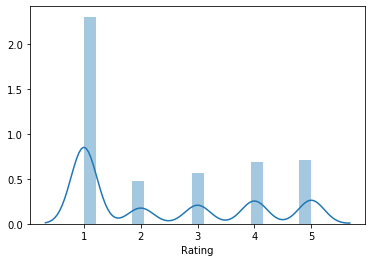

In [19]:
sns.distplot(df["Rating"])                                  #displacement of Rating

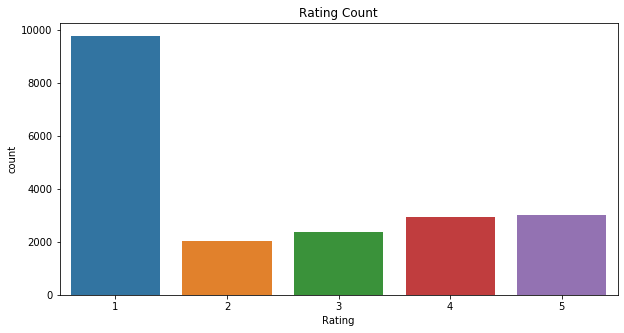

In [20]:
plt.figure(figsize=(10,5))                                 #count of ratings
sns.countplot(df["Rating"])
plt.title("Rating Count")
plt.show()

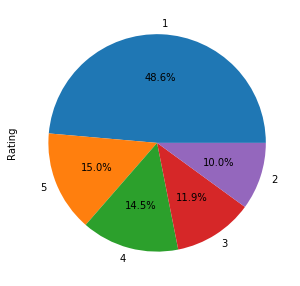

In [21]:
plt.figure(figsize=(10,5))
df["Rating"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

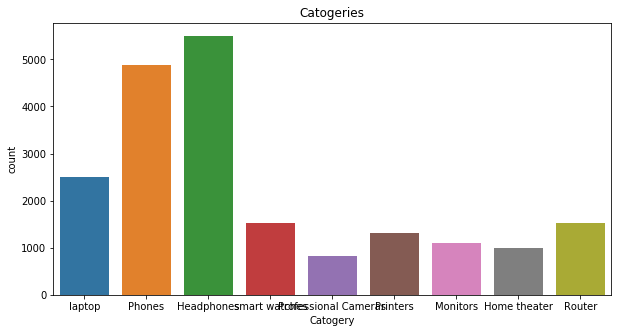

In [22]:
plt.figure(figsize=(10,5))                                         #count of category
sns.countplot(df["Catogery"])
plt.title("Catogeries")
plt.show()

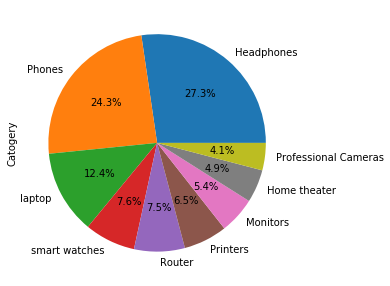

In [23]:
plt.figure(figsize=(10,5))
df["Catogery"].value_counts().plot.pie(autopct="%.1f%%")
plt.show()

Pre-processing Text Data

In [24]:
df["Review"]=df["Review"].str.lower()                                   #to convert as lower case
#make tokenize
df["Review"]=df.apply(lambda x:word_tokenize(x["Review"]),axis=1)
#to remove numeric terms
df["Review"]=df["Review"].apply(lambda x:[word for word in x if word.isalpha()])
#to lemmatize each word
df["Review"]=df["Review"].apply(lambda x:[WordNetLemmatizer().lemmatize(word) for word in x ])
#to remove stopwords
df["Review"]=df["Review"].apply(lambda x:[word for word in x if word not in stopwords.words("english")])
df["Review"]=df["Review"].apply(lambda x: str(" ".join(x)))

In [25]:
len(df["Review"])                              

20125

In [26]:
df["clear_length"]=df["Review"].str.len()

In [27]:
df["length"].sum()                                              #length of text before preprocessing

4913782

In [28]:
df["clear_length"].sum()                                       #length of tect after preprocessing

3072869

nearly 1860000 are junk value

model selection

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer   #sentiment analysis

In [30]:
sia=SentimentIntensityAnalyzer()
for index, row in df["Summery"][df["Rating"]==3].items(): 
    print(sia.polarity_scores(row))

{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'compound': 0.2263}
{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.34}
{'neg': 0.0, 'neu': 0.804, 'pos': 0.196, 'compound': 0.2382}
{'neg': 0.804, 'neu': 0.196, 'pos': 0.0, 'compound': -0.6249}
{'neg': 0.361, 'neu': 0.639, 'pos': 0.0, 'compound': -0.3089}
{'neg': 0.294, 'neu': 0.706, 'pos': 0.0, 'compound': -0.1695}
{'neg': 0.6, 'neu': 0.4, 'pos': 0.0, 'compound': -0.5423}
{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'compound': 0.4404}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5719}
{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'compound': 0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.21, 'neu': 0.381, 'pos': 0.41, 'compound': 0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.546, 'neu': 0.454, 'pos': 0.0, 'compound': -0.3412}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.128, 'neu': 0.565, 'pos': 0.307, 'compound': 0.4953}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.118, 'neu': 0.687, 'pos': 0.195, 'compound': 0.25}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.5859}
{'neg': 0.293, 'neu': 0.707, 'pos': 0.0, 'compound': -0.4404}
{'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'compound': -0.4753}
{'neg': 0.417, 'neu': 0.583, 'pos': 0.0, 'compound': -0.6486}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.506, 'pos': 0.494, 'compound': 0.4466}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer              #convert text to vector

In [32]:
vect=TfidfVectorizer(ngram_range=(1,3))
text=vect.fit_transform(df["Review"])

Import model

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
x=text                                               #spliting of data
y=df["Rating"]

In [35]:
print(x.shape)
print(y.shape)

(20125, 551695)
(20125,)


In [36]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=42)

In [48]:
nb=MultinomialNB()
nb.fit(xtrain,ytrain)
pred=nb.predict(xtest)
print(accuracy_score(ytest,pred))

0.5315977742448331


In [38]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)
print(accuracy_score(ytest,pred))

0.6446740858505564


In [39]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
pred=dt.predict(xtest)
print(accuracy_score(ytest,pred))

0.6287758346581876


In [40]:
kn=KNeighborsClassifier()
kn.fit(xtrain,ytrain)
pred=kn.predict(xtest)
print(accuracy_score(ytest,pred))

0.4862877583465819


Cross validation:

In [41]:
model=[nb,rf,dt,kn]
for i in model:
    print(i,cross_val_score(i,x,y,cv=4).mean())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 0.5048010098822922
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 0.5070944927635483
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 0.481707

MultinomialNB is consider as a good model when compare with other

Hyperparameter tuneing

In [42]:
para={'alpha': np.linspace(0.5, 1.5, 6),'fit_prior': [True, False],}
gv=GridSearchCV(MultinomialNB(),para,cv=4)
gv.fit(xtrain,ytrain)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5]),
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
gv.best_score_

0.634731332405751

In [44]:
gv.best_estimator_

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False)

In [45]:
text=vect.transform(["nice"])
gv.predict(text)

array([4], dtype=int64)